# CONSENSUS ANALYSIS OF CASSETTES

In [21]:
import numpy as np
import pandas as pd
from scipy.sparse import coo_matrix
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
# Reading clustering files
cassettes_r60 = pd.read_csv("/Users/isasiain/PhD/Projects/project_3/analysis/cassettes_resampling/consensus/n_res60_cassettes.csv", index_col=0)
cassettes_r100 = pd.read_csv("/Users/isasiain/PhD/Projects/project_3/analysis/cassettes_resampling/consensus/n_res100_cassettes.csv", index_col=0)

In [50]:
# Reading top variance cpgs to show
top_5000_cpgs = pd.read_csv("/Users/isasiain/PhD/Projects/project_3/analysis/cassettes_resampling/consensus/distal_top_var_5000.txt", header=None)
top_10000_cpgs = pd.read_csv("/Users/isasiain/PhD/Projects/project_3/analysis/cassettes_resampling/consensus/distal_top_var_10000.txt", header=None)

In [62]:
# Step 1: Convert to list
cpg_list = top_5000_cpgs.iloc[:, 0].to_list()

# Step 2: Filter to those in index of cassettes_r100
filtered_cpgs = [cpg for cpg in cpg_list if cpg in cassettes_r100.index]
filtered_cpgs

[]

In [ ]:
cassettes_r100 = cassettes_r100.loc[top_5000_cpgs.iloc[:,0],]

Index(['cg16535257', 'cg25742326', 'cg15713103', 'cg11211792', 'cg04788999',
       'cg02341264', 'cg06712559', 'cg17928920', 'cg16318112', 'cg09248054',
       ...
       'cg20991802', 'cg06134315', 'cg22517656', 'cg23829904', 'cg14536332',
       'cg01421780', 'cg15677694', 'cg04094346', 'cg11553066', 'cg10888337'],
      dtype='object', length=66211)

In [36]:
# Example DataFrame setup (use your actual DataFrame here)
# Each column represents a different clustering run, each row a CpG

# Step 1: Setup
ids = list(cassettes_r100.index)  # CpG identifiers
n = len(ids)  # Number of CpGs
id_to_idx = dict(zip(ids, range(n)))  # Map CpG labels to matrix indices

# This will store co-clustering counts only (no normalizing)
pair_counts = defaultdict(int)

# Step 2: Iterate through each clustering result (each column in DataFrame)
for col in cassettes_r100.columns:  # Iterate over clustering runs (columns)
    clustering = cassettes_r100[col].dropna()  # Drop NaN values (CpGs not present in this clustering)
    
    # List of CpGs in this clustering run (after dropping NaNs)
    present_ids = clustering.index.tolist()  # The CpGs present in this clustering

    # Step 3: Count co-clustered CpGs
    for i in range(len(present_ids)):
        for j in range(i + 1, len(present_ids)):
            id1, id2 = present_ids[i], present_ids[j]
            idx1, idx2 = id_to_idx[id1], id_to_idx[id2]

            if clustering[id1] == clustering[id2]:  # Same cluster in this run
                pair_counts[(idx1, idx2)] += 1
                pair_counts[(idx2, idx1)] += 1  # Ensure symmetry

# Step 4: Build COO sparse matrix from counts
row_idx = []
col_idx = []
data = []

for (i, j), count in pair_counts.items():
    row_idx.append(i)
    col_idx.append(j)
    data.append(count)

consensus_matrix = coo_matrix((data, (row_idx, col_idx)), shape=(n, n))
print(consensus_matrix)

<COOrdinate sparse matrix of dtype 'int64'
	with 2541734 stored elements and shape (2000, 2000)>
  Coords	Values
  (0, 3)	14
  (3, 0)	14
  (0, 4)	12
  (4, 0)	12
  (0, 17)	18
  (17, 0)	18
  (0, 18)	9
  (18, 0)	9
  (0, 19)	5
  (19, 0)	5
  (0, 20)	6
  (20, 0)	6
  (0, 21)	14
  (21, 0)	14
  (0, 29)	10
  (29, 0)	10
  (0, 30)	16
  (30, 0)	16
  (0, 31)	14
  (31, 0)	14
  (0, 32)	13
  (32, 0)	13
  (0, 35)	3
  (35, 0)	3
  (0, 36)	11
  :	:
  (1931, 1905)	1
  (1905, 1994)	1
  (1994, 1905)	1
  (1906, 1995)	1
  (1995, 1906)	1
  (1913, 1965)	1
  (1965, 1913)	1
  (1913, 1966)	1
  (1966, 1913)	1
  (1913, 1967)	1
  (1967, 1913)	1
  (1913, 1968)	1
  (1968, 1913)	1
  (1913, 1978)	1
  (1978, 1913)	1
  (1913, 1984)	1
  (1984, 1913)	1
  (1931, 1975)	1
  (1975, 1931)	1
  (1934, 1978)	1
  (1978, 1934)	1
  (1967, 1978)	1
  (1978, 1967)	1
  (1975, 1985)	1
  (1985, 1975)	1


/Users/isasiain/miniconda3/envs/cassettes/lib/python3.13/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/isasiain/miniconda3/envs/cassettes/lib/python3.13/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/Users/isasiain/miniconda3/envs/cassettes/lib/python3.13/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/isasiain/miniconda3/envs/cassettes/lib/python3.13/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


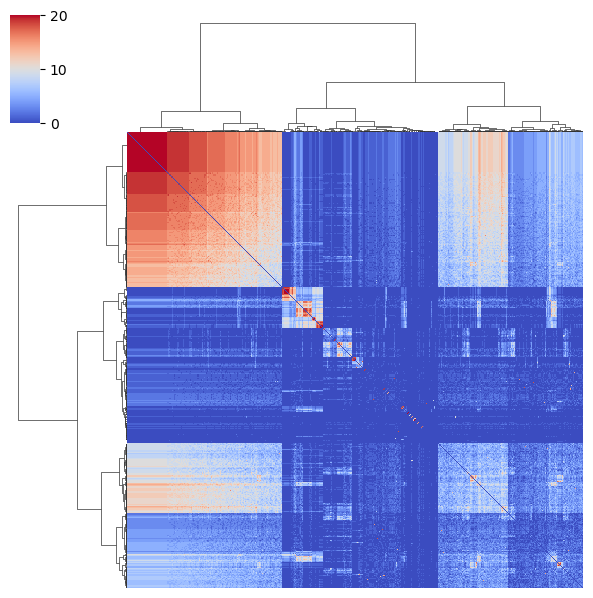

In [37]:
# Convert to dense array for plotting
consensus_matrix_dense = consensus_matrix.toarray()

sns.clustermap(consensus_matrix_dense, 
               cmap="coolwarm", 
               method="ward", 
               metric="euclidean", 
               figsize=(6, 6),
               xticklabels=False, yticklabels=False
               )
plt.show()